# Module 1 Final Project

* Student names: Troy D. Dunkley and Jack Risse
* Student pace: Full Time
* Scheduled project review date/time: Monday 09.07.18
* Instructors' names: Amber Yandow and Howard Smith

## CRISP-DM Methodology

Cross Industry Standard Proces for Data Mining, also known as the CRISP-DM Methodology, is being employed for this project. It is an open standard process model that describes common approaches used by data mining experts. CRISP-DM is currently the dominant process framework for data mining. It is comprised of the following phases:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

Below is a diagram of the methodology process flow:

<img src="CRISPDM_Process_Diagram.png" align="center">

Please note that there are some phases of the methodology that will not apply to this project, however we want to be transparent regarding the methodology process.

## Project: King County Housing Data

<img src="SeattleNight.jpg">


### Business Understanding

The Business Understanding Phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan. The primary tasks within this phase include the following:

* Determine Business Objectives
* Assess Situation
* Determine Data Mining Goals
* Produce Project Plan

#### Determine Business Objective

*Background:*

The overall population of King County has increased from around 1.5 million residents in 1990 to over 2.1 million residents in 2018, an increase of 45%. This was significantly faster than overall U.S. population growth of 32% from 1990 to 2018. During this time period, the number of residents living in unincorporated King County has decreased by half.
 
This trend is due to population growth centered in cities, newly created cities, and annexations of formerly unincorporated areas into cities, a trend further revealed by the population growth in the five largest cities in King County. Furthermore, King County added eight new cities, going from 31 incorporated cities in 1990 to 39 cities in 2018. However, while the population residing in unincorporated areas of King County is on the decline, its population still ranks second behind the City of Seattle. 

Even with rapid population growth and changing demographics in terms of countries of origin and racial makeup, the types of households in which King County residents reside have remained largely unchanged since 2000. As of 2017, 60% of King County residents live in family households - married with or without children, or single parent households. About 29% of King County residents live alone, while the remaining 11% live in other non-family household arrangements. 

The breakdown of household types is similar for the United States as a whole, although a higher proportion of US residents, nearly 66%, live in family households. Single-parent households are more prevalent in the United States than in King County, while non-family households hold a smaller share of the US population than that of King County

*Business goal:* 

The goal of this project is to identify relevant variables that impact the optimal sale price of homes in the greater Kings County, Washington area.

*Business success criteria:* 

To use Multiple Linear Regression to estimate or predict price corresponding to a set of predictor variables within the dataset. In addition, we will document the functional relationship between the dependent and independent variables to determine causes of variation in the dependent variable.

#### Assess Situation

This task is not applicable for this project; however, assessments are typically comprised of the following:

* Prodiving an inventory of resources (Data Managers, Technical Support, etc.)
* Document requirements, assumptions and constraints
* Identify risks and contingencies
* Chronicle relevant terminology
* Preparation of Cost-Benefit Analysis

#### Determine Data Mining Goals

The Data Mining goal for this project is to usse Linear and Multivariable Regression models in addition to various visualizations. Data Mining success criteria is to identify all predictor variable(s) lead to the most accurate prediction of price.

#### Produce Project Plan

This task is not applicable for this project, however we will leveraging various Python librairies to assist us with our analysis.

### Data Understanding

This phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. Below are tasks associated with this phase:

* Collect Initial Data
* Describe Data
* Explore Data
* Verify Data Quality

#### Collect Initial Data

In [1]:
# import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn')
import folium as fl
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression

# read data into dataframe:

df = pd.read_csv('kc_house_data.csv')

#### Describe Data

In this project, the dataset of Kings County housing sales data will be utilized; it is in the form of a .csv file. Below are descriptions of the columns within the dataset:

* **id** - Unique identifier for a house
* **date** - Date house was sold
* **price** -  Prediction target
* **bedrooms** -  Number of bedrooms in the house
* **bathrooms** -  Number of bathrooms in the house
* **sqft_living** -  Square footage of the house
* **sqft_lot** -  Square footage of the lot
* **floors** -  Number of floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Flag that determines if house has been viewed
* **condition** - How good the condition of the house is ( Overall )
* **grade** - Overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Square footage of house apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year house was built
* **yr_renovated** - Year house was renovated
* **zipcode** - Zip Code
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


#### Explore Data

The goal of this task is to examine the data within the dataset more closely. We will look at the range of values for each variable and their distributions. This should allow us to get familiar with data, spot signs of data quality problems and set the stage for data preperation.

In [2]:
# Return the first 5 rows for the dataset:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset's distribution, excluding "NaN" values:

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Print information about the dataset including the index, column dtypes, non-null values 
# and memory usage:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# Determine the dimensionality of the dataset:

df.shape

(21597, 21)

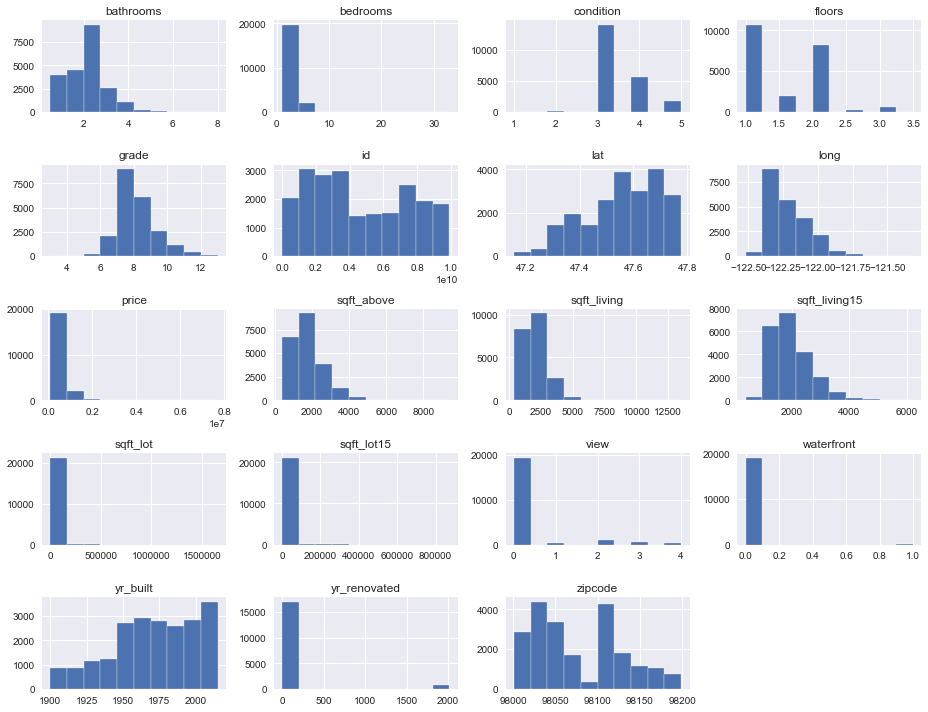

In [6]:
# Create a representation of the distribution of data for each variable:

df.hist(figsize=(13,10));
plt.tight_layout()
plt.show()

#### Verify Data Quality

During this portion of the analysis, we've derived the following:

* 21,597 rows and 21 columns exist within the dataset
* view, waterfront and yr_renovated appear to have NaN values
* date and sqft_basement should not have an object data type
* view, waterfront, bedrooms and yr_renovated appear to have outliers
* grade appears to have a normal distrubtion of data; most variables exhibit skewness
* Most of the values for sqft_lot and sqft_lot15 appear to be zero

### Data Preparation

The data preparation phase covers all activities to construct the final dataset from the initial raw data. These activities include the following:

* Select Data
* Clean Data
* Construct Data
* Integrate Data
* Format Data

Data preparation is 80% of the process. The two core activities in this phase are 
Data Wrangling and Data Analysis; they are the first logical programming steps. Data Wrangling is cyclical in nature and is language/framwork independent, so it will be necessary revisit the steps multiple times.

We will perform syntactical and meaningful checks on the data and identify any issues and recommend potential fixes.

#### Select Data

In [7]:
display (df.head());
df.info();

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Clean Data

This task invoves the follwing steps:

* Check for missing data/impute values
* Check for duplicates
* Check for extraneous values
* Drop columns (if necessary)
* Drop rows (if necessary)

First, we will check for missing data by executing the code below:

In [8]:
# Generate boolean value to determine missing values in columns:

df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
# Generate counts for missing values in columns:

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Our inquiries have confirmed that null values exist, so now we will determine the percentage of null values within the columns and view the uniqure values:

In [10]:
# Determine what percentage of rows in the Waterfront column contain missing values
# Print out the number of unique values in this column

print('Percentage of Null Waterfront Values:', round((len(df[df.waterfront.isna()])/ len(df)),2)*100,'%')
print('Number of Unique Waterfront Values Excluding Nulls:', df.waterfront.nunique())
# print (len(df.waterfront.unique()))
print (' ')
print ('Waterfront Counts')
print ('------------------')
print(df.waterfront.value_counts())
print (' ')

Percentage of Null Waterfront Values: 11.0 %
Number of Unique Waterfront Values Excluding Nulls: 2
 
Waterfront Counts
------------------
0.0    19075
1.0      146
Name: waterfront, dtype: int64
 


In [11]:
# Determine what percentage of rows in the View column contain missing values:

print('Percentage of Null View Values:', round((len(df[df.view.isna()])/ len(df)),2)*100,'%')
print('Number of Unique View Values Excluding Nulls:', df.view.nunique())
# print (len(df.view.unique()))
print (' ')
print ('View Counts')
print ('------------------')
print(df.view.value_counts())
print (' ')

Percentage of Null View Values: 0.0 %
Number of Unique View Values Excluding Nulls: 5
 
View Counts
------------------
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
 


In [12]:
# Determine what percentage of rows in the Year Renovated column contain missing values:

print('Percentage of Null Year Renovated Values:', round((len(df[df.yr_renovated.isna()])/ len(df)),2)*100,'%')
print('Number of Unique Year Renovated Values Excluding Nulls:', df.yr_renovated.nunique())
print (' ')
# print (len(df.yr_renovated.unique()))
print (df.yr_renovated.unique())
print (' ')

Percentage of Null Year Renovated Values: 18.0 %
Number of Unique Year Renovated Values Excluding Nulls: 70
 
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
 


Based on the percentages associated with these three fields, we have determined that deleting the columns is not neccessary. Our finidings suggest that we should perform the following actions:

* Convert the null Waterfront values to zero using the median
* Convert the null View values to zero using the median
* Convert the null Year Renovated values to zero


In [13]:
# Validate median totals before update:

print ('Watefront Median = ',round(df.waterfront.median(),2))
print ('View Median = ',round(df.view.median(),2))

Watefront Median =  0.0
View Median =  0.0


In [14]:
# Convert null Waterfront and View values to zero using the median:

df['waterfront'] = df.view.fillna(value=df.waterfront.median())
df['view'] = df.view.fillna(value=df.view.median())

# Convert null Year Renovated values to zero:

df['yr_renovated'] = df.yr_renovated.fillna(value=0)

Now we are going to confirm that the updates were successful:

In [15]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Now we will check for duplicates within the dataset; please note that the only column that may contain invalid duplicate values is id:

In [16]:
# Return boolean Series denoting duplicate rows, optionally only
# considering certain columns

df[df.duplicated(['id'], keep=False)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,3.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,3.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


After inspecting the results, we determined that the duplicate ids were valid since a home can have multiple sale dates associated with it.

Now we will check for extraneous values:

In [17]:
# Checking for extraneous values:

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

We noticed that the sqft_basement variable contains an invalid character of "?", so we calculated the occurances and the percentage they represent within the dataset:

In [18]:
# Access a group of rows and columns by label(s) or a boolean array:
# Determine what percentage of rows in the View column contain missing values:

print ('Number of rows where sqft_basement equals "?" = ',len(df.loc[df['sqft_basement'] == '?']))
print ('Percentage of rows where sqft_basement equals "?" = ',round((len(df.loc[df['sqft_basement'] == '?'])/len(df)),2)*100,'%')


Number of rows where sqft_basement equals "?" =  454
Percentage of rows where sqft_basement equals "?" =  2.0 %


We also noticed that apporximately 95.8% of the yr_renovated rows are zero, so the decision was made to impute the 
following:

* Zero values for the invalid sqft_basement values
* Change the values in the yr_renovated variable to represent the Boolean types of 0 or 1

In [19]:
# Replace values given in `to_replace` with `value`:

df['sqft_basement'].replace('?',0, inplace = True)

# Replace yr_renovated values:

df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

#Confirm results:

print ('')
print ('Square Feet Basement "?" Audit')
print ('------------------------------')
print ('')
print(df.loc[df['sqft_basement'] == '?'])
print ('')
print ('Year Renovated Counts Audit')
print ('---------------------------')
df['yr_renovated'].value_counts()



Square Feet Basement "?" Audit
------------------------------

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

Year Renovated Counts Audit
---------------------------


0    20853
1      744
Name: yr_renovated, dtype: int64

After reviewing our dataset, we decided that dropping rows is not an appropriate choice since we addressed all missing values within our dataset.

We will address dropping columns after we've finished formatting out data.

#### Constructing Data

We decided that we did not need to add new fields/rows to the dataset.

#### Integrating Data

We did not have any disparate datasets to add to the current dataset.

#### Formatting Data

Our objective for this task is the reformat the following variables to integers:

* bathrooms
* floors
* waterfront
* sqft_basement


In [20]:
# Cast a pandas object to a specified dtype:

df.bathrooms = df.bathrooms.astype('int64')
df.floors = df.floors.astype('int64')
df.waterfront = df.waterfront.astype('int64')
df.sqft_basement = df.sqft_basement.astype('float').astype('int')
df.waterfront = df.waterfront.astype('int64')

print('Unique Bathroom Values:',df.bathrooms.unique())
print (' ')
print('Unique Floor Values:',df.floors.unique())
print (' ')
print('Unique Waterfront Values:',df.waterfront.unique())
print (' ')
print('Unique Square Feet Basement Values:',df.sqft_basement.unique())

Unique Bathroom Values: [1 2 3 4 0 5 6 8 7]
 
Unique Floor Values: [1 2 3]
 
Unique Waterfront Values: [0 3 4 2 1]
 
Unique Square Feet Basement Values: [   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 

In regards to dropping columns, we decided to generate a Correleation Matrix and Correlation Heat Map to aid in our evaluation:

 
Correlation Matrix:
-------------------


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,-0.000120,-0.012241,-0.131911,0.019229,0.011772,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010621,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.510631,0.701917,0.089876,0.237264,0.393497,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117543,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.465995,0.578212,0.032471,0.158065,0.078354,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017635,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,-0.000120,0.510631,0.465995,1.000000,0.698591,0.086029,0.486404,0.175111,0.175111,-0.127328,0.607156,0.640895,0.245693,0.434536,0.056899,-0.160478,0.031074,0.180787,0.510950,0.082039
sqft_living,-0.012241,0.701917,0.578212,0.698591,1.000000,0.173453,0.353372,0.281715,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.050829,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.086029,0.173453,1.000000,-0.008603,0.075054,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.005091,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.019229,0.237264,0.158065,0.486404,0.353372,-0.008603,1.000000,0.023711,0.023711,-0.293463,0.473273,0.518037,-0.231754,0.578549,-0.009580,-0.097146,0.029218,0.159481,0.296797,-0.012766
waterfront,0.011772,0.393497,0.078354,0.175111,0.281715,0.075054,0.023711,1.000000,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090480,0.085059,0.006321,-0.077702,0.278928,0.073083
view,0.011772,0.393497,0.078354,0.175111,0.281715,0.075054,0.023711,1.000000,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090480,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.127328,-0.059445,-0.008830,-0.293463,0.045622,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055383,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


 
Correlation Heat Map:
---------------------


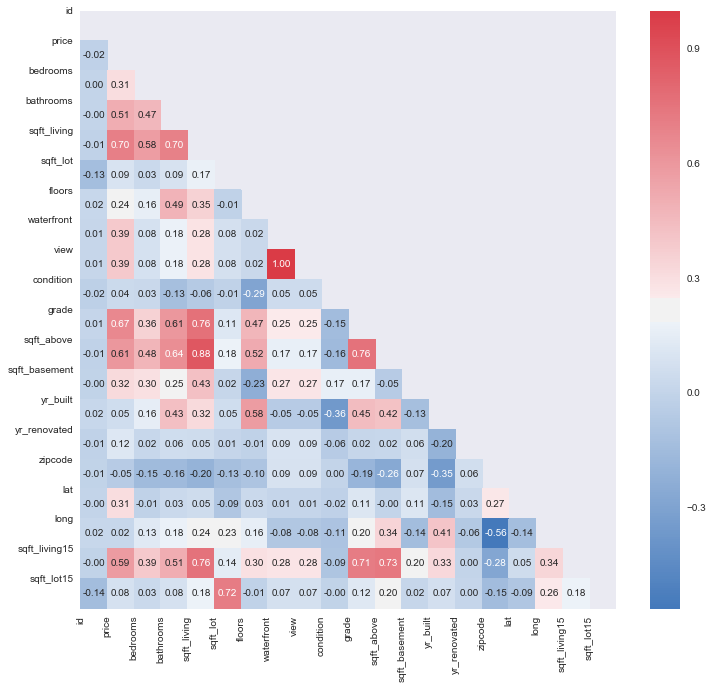

In [21]:
# Compute pairwise correlation of columns, excluding NA/null values
print (' ')
print ('Correlation Matrix:')
print ('-------------------')
display (df.corr())

def heatMap(df, mirror):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(12, 11))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2g")
              #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
              #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
              #show plot

    else:
          # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
              # Generate Color Map
              # 220, 10
        colormap = sns.diverging_palette(250, 10, as_cmap=True)
              # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
              # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
              # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
           # show plot
        plt.show()
 
print (' ')
print ('Correlation Heat Map:')
print ('---------------------')
heatMap(df,False)

After analyzing the visualizations above, we wanted to confirm our findings by looking at an abosulte value correlation above 0.6:

In [22]:
# Return the absolute value of the argument;
# Compute pairwise correlation of columns, excluding NA/null values:

abs(df.corr()) > 0.6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


#### Exploratory Data Analysis Questions

We decided to ask some questions before proceeding. The questions are as follows:

* Does it make sense to drop the column "sqft_living"?
* Is King County, Washington growing as a community?
* Does adding a bathroom or bedroom increase the sale price of a home?


We know that sqft_living has significant multicollinearity, but we wanted to compare its correlation to the associated features of sqft_above and sqft_basement:


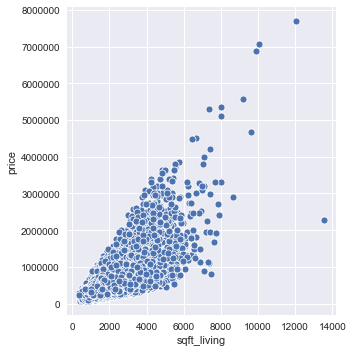

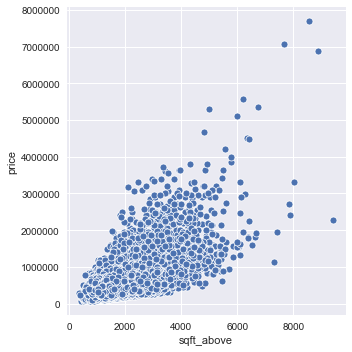

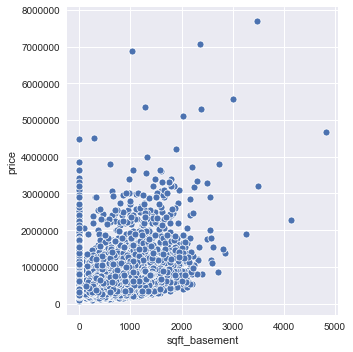

In [23]:
cols = [col for col in df.columns if col in ['sqft_living', 'sqft_above' ,'sqft_basement']]
df2 = df[cols]
df2
for column in (df2.columns):
    sns.relplot(x=column, y="price", data=df, palette='dark');

Since sqft_living has high multicollinearity, is an amalgamation of sqft_above and sqft_basement and the seperate variables can provide more insight, we decided to drop sqft_living.

To determine the growth of Kings County, we decided to create some decade bins and lineplot the results:

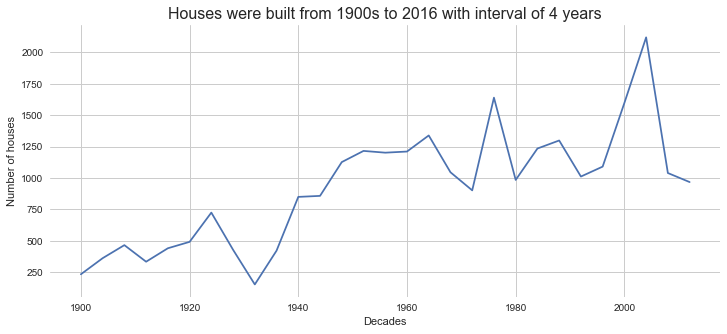

In [24]:
# Assign Year Built to a list to build the decades bin:

yr_built = df.yr_built

# Assign an array with intervals of decades:

decades = np.linspace(1900, 2016, 30, dtype='int') 
count = [] # count will be a list of numbers representing how many houses were built in that decades
for i in range(0,29): # for loop to create the count list conditionals to count how many houses were built in a given
    count.append(len(df[(yr_built >= decades[i]) & (yr_built <= decades[i+1])])) # decade
    
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.lineplot(decades[:-1], count)
plt.title('Houses were built from 1900s to 2016 with interval of 4 years', 
          fontdict={'fontsize': 16})
plt.xlabel('Decades')
plt.ylabel('Number of houses')
plt.show()

The graph seems to indicates that there has been significant growth since 1960, which impacts the price of real estate.

To determine if adding an additional bathroom or bedroom will impact price, we created a strip plot since it shows all observations along with some representation of underlying distribution:

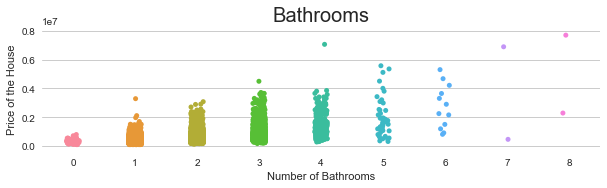

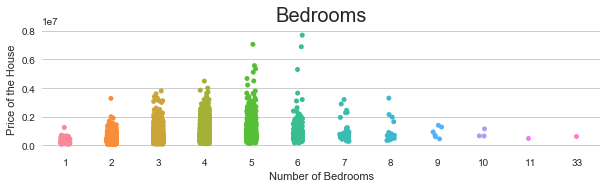

In [25]:
# Compare Bathrooms v. Price and Bedrooms v. Price:

plt.figure(figsize=(10,5))
plt.subplot(211)
sns.stripplot(x='bathrooms', y='price', data=df)
plt.title('Bathrooms', fontdict={'fontsize':20})
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price of the House')
print(' ')
plt.figure(figsize=(10,5))
plt.subplot(212)
sns.stripplot(x='bedrooms', y='price', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price of the House')
plt.title('Bedrooms', fontdict={'fontsize':20})
plt.show()

It appears that adding additional bedrooms will directly correlate to a higher sale price.

After reviewing the results above, we concluded that we can remove the following columns from our dataset due to low colinearity and multicolinearity:

* id
* date
* view
* yr_built
* zipcode
* lat
* long
* sqft_living15
* sqft_lot15
* sqft_living

In [26]:
# Drop specified labels from columns:

def drop_cols(columns, df):
    return df.drop(columns, axis=1, inplace=True)

drop_cols(['id', 'date', 'view', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15','lat', 'long','sqft_living'], df)
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated
0,221900.0,3,1,5650,1,0,3,7,1180,0,0
1,538000.0,3,2,7242,2,0,3,7,2170,400,1
2,180000.0,2,1,10000,1,0,3,6,770,0,0
3,604000.0,4,3,5000,1,0,5,7,1050,910,0
4,510000.0,3,2,8080,1,0,3,8,1680,0,0


### Modeling

According to the methodology, modeling techniques are now selected and applied at this point during the process.  Since some techniques have specific requirements regarding the structure of the data, so there can be a loop back to Data Preparation. The tasks are:

* Select Modeling Technique
* Generate Test Design
* Build Model
* Assess Model

#### Select Modeling Technique

The modeling technique that we are implementing is Multiple Regression levarging Backward Selection method of entry.
There are no modeling assumptions to take into account for this project.


#### Generate Test Design 

We leveraged one-hot endcoding to create dummy variables for our categorical variables:

In [27]:
df.bedrooms = df.bedrooms.astype(str) # converting categorical features to strings to make dummy columns
df.bathrooms = df.bathrooms.astype(str)
df.waterfront = df.waterfront.astype(str)
df.floors = df.floors.astype(str)                 
df.condition = df.condition.astype(str)
df.grade = df.grade.astype(str)

waterfront_dummies = pd.get_dummies(df.waterfront, prefix='waterfront', drop_first=True) # creating the dummies
condition_dummies = pd.get_dummies(df.condition, prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(df.grade, prefix='grade', drop_first=True)     
floors_dummies = pd.get_dummies(df.floors, prefix='floors', drop_first=True)  
bedrooms_dummies = pd.get_dummies(df.bedrooms, prefix='bedrooms', drop_first=True)
bathrooms_dummies = pd.get_dummies(df.bathrooms, prefix='bathrooms', drop_first=True)

cat_df = pd.concat([waterfront_dummies, condition_dummies, grade_dummies, # creating categorical and continuous 
                  floors_dummies, bedrooms_dummies, bathrooms_dummies], axis=1) # dataframes
con_df = pd.DataFrame(data=df, columns=['price', 'sqft_above', 'sqft_lot', 'sqft_basement']) 

display(cat_df.head(2))
con_df.head(2)


,waterfront_1,waterfront_2,waterfront_3,waterfront_4,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,...,bedrooms_8,bedrooms_9,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


,price,sqft_above,sqft_lot,sqft_basement
0,221900.0,1180,5650,0
1,538000.0,2170,7242,400


We then proceeded to normalize our continuous features:

In [28]:
# MinMaxScaler was imported to put all of continuous features into the 
# the same scale because each feature had their own "unit" 
# this ensures that our model won't get confused or misinterpret the 
# data when learning and creating relationships between the features    

from sklearn.preprocessing import MinMaxScaler                                                
scaler = MinMaxScaler()                               
conNorm = scaler.fit_transform(con_df)
con_df = pd.DataFrame(conNorm, columns=['price', 'sqft_above', 'sqft_lot', 'sqft_basement'])

#### Build Model

The attributes of our model include:

* Mulitple Linear Regression
* Categorical Testing
* MinMax Scaling was implemented since it may yield better results (r-squared)
* Backward Selection method; iterations start with considering all the variables and we will remove variables one by  one until all the prescribed statistics are satisfied.
* Utilize Test-Train Split to address overfitting and underfitting; essentially we want to calculate how well our predicitons are compared to actual targets of price and the fitted "price" derived from our model


In [29]:
# train_test_split was imported; will split our data into a training
# sample and test sample. This was done to make sure our model 
# isn't overfitted:

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error       
import statsmodels.api as sm                         

xcon = con_df.iloc[:, 1:] # creating a dataframe with just the continuous features without price
xcat = cat_df             # reassigning cat_df to xcat just a naming preference of mine when training the models
y = list(df.price)        # for some reason statsmodels didn't like that the target variable was in a series so it was 
                          # converted
con_xtrain, con_xtest, con_ytrain, con_ytest = train_test_split(xcon, y, test_size=.3) # spliting the data

con_model = sm.OLS(con_ytrain, con_xtrain).fit() # linear regression OLS (ordered least squares)
con_yhat = con_model.predict(con_xtest)          # predicted prices derived the model with our continuous features

con_resd = np.round(con_ytest - con_yhat, decimals=2) # get the residuals to tell us the average distance from the
                                                      # real price and the price 
print('r2: ', np.round(con_model.rsquared))
print('\n**********************\n')
print('p-values: \n', con_model.pvalues)
print('\n**********************\n')         # prints out some of the key stats from the summary of our model
print('Params: \n', con_model.params)
print('\n**********************\n')
print('Mean of Residuals: ', np.round(con_resd.mean(), decimals=2))

r2:  1.0

**********************

p-values: 
 sqft_above       0.000000e+00
sqft_lot         1.477811e-11
sqft_basement    0.000000e+00
dtype: float64

**********************

Params: 
 sqft_above       2.814817e+06
sqft_lot        -5.763778e+05
sqft_basement    1.529166e+06
dtype: float64

**********************

Mean of Residuals:  12626.5


There were some high p-value outputs on the first run of our model. We decided to use the Backward Selection approach for feature selection. This approach entails running the model by removing one variable at a time until all the p-values are less than .05.

Regression for Categorical Variables:

In [30]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # linear regression using the OLS (ordered least squares) model
cat_yhat = cat_model.predict(cat_xtest)          # predicted prices derived from the model with our continuous features
print('p-values: \n', np.round(cat_model.pvalues, decimals=5)) # printing out the p-values made the backward feature 
print('\n**********************\n') # selection process quicker 

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_2     0.00000
condition_3     0.00000
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.04913
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00002
floors_3        0.11195
bedrooms_10     0.36259
bedrooms_11     0.58804
bedrooms_2      0.00060
bedrooms_3      0.01257
bedrooms_33     0.07586
bedrooms_4      0.00004
bedrooms_5      0.00000
bedrooms_6      0.00026
bedrooms_7      0.04336
bedrooms_8      0.01245
bedrooms_9      0.04209
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00000
dtype: float64

**********************



1st Iteration: Dropping condition_3 and re-running:

In [31]:
cat_df.drop(columns=['condition_3'], inplace=True) # dropped the feature with the greatest p-value that was above .05

cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 2nd iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_2     0.56061
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.59090
grade_4         0.00268
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.01213
floors_3        0.21760
bedrooms_10     0.11300
bedrooms_11     0.32372
bedrooms_2      0.00000
bedrooms_3      0.00000
bedrooms_33     0.14074
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00000
bedrooms_7      0.00001
bedrooms_8      0.00000
bedrooms_9      0.00085
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.05875
bathrooms_8     0.00000
dtype: float64

**********************



2nd Iteration: Dropping bedrooms_11 and re-running:

In [32]:
cat_df.drop(columns=['bedrooms_11'], inplace=True) # dropping the feature with the greatest p-value that's above .05

cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 3rd iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_2     0.42432
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.61394
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00271
floors_3        0.13820
bedrooms_10     0.17626
bedrooms_2      0.00000
bedrooms_3      0.00000
bedrooms_33     0.16758
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00000
bedrooms_7      0.02091
bedrooms_8      0.00000
bedrooms_9      0.06542
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00778
bathrooms_8     0.00000
dtype: float64

**********************



3rd Iteration: Dropping bedrooms_3 and re-running:

In [33]:
cat_df.drop(columns=['bedrooms_3'], inplace=True) # dropping the feature with the greatest p-value that's above .05

cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 4th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_2     0.95999
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00000
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.04664
floors_3        0.23611
bedrooms_10     0.89975
bedrooms_2      0.00006
bedrooms_33     0.00000
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00053
bedrooms_7      0.05184
bedrooms_8      0.00030
bedrooms_9      0.25410
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00000
dtype: float64

**********************



4th Iteration: Dropping bedrooms_10 and re-running:

In [34]:
cat_df.drop(columns=['bedrooms_10'], inplace=True) # dropping the feature with the greatest p-value that's above .05

cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 5th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_2     0.95694
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.60424
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00720
floors_3        0.69358
bedrooms_2      0.01127
bedrooms_33     0.47872
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00560
bedrooms_7      0.03226
bedrooms_8      0.00016
bedrooms_9      0.01770
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00091
dtype: float64

**********************



5th Iteration: Dropping bedrooms_7 and re-running:

In [35]:
cat_df.drop(columns=['bedrooms_7'], inplace=True) # dropping the feature with the greatest p-value that's above .05

cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 6th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_2     0.95280
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.62109
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.04281
floors_3        0.58617
bedrooms_2      0.00024
bedrooms_33     0.00000
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00003
bedrooms_8      0.00082
bedrooms_9      0.00846
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00000
dtype: float64

**********************



6th Iteration: Dropping condition_2 and re-running:

In [36]:
cat_df.drop(columns=['condition_2'], inplace=True)# dropping the feature with the greatest p-value that's above .05

cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 7th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.60404
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00997
floors_3        0.20769
bedrooms_2      0.00039
bedrooms_33     0.47744
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00013
bedrooms_8      0.00000
bedrooms_9      0.04727
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00000
dtype: float64

**********************



7th Iteration: Dropping floors_3 and re-running:

In [37]:
cat_df.drop(columns=['floors_3'], inplace=True)# dropping the feature with the greatest p-value that's above .05

cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 8th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.61930
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.03644
bedrooms_2      0.00010
bedrooms_33     0.48742
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00001
bedrooms_8      0.00000
bedrooms_9      0.01501
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00937
bathrooms_8     0.00035
dtype: float64

**********************



8th Iteration: Dropping bedrooms_9 and re-running:

In [38]:
cat_df.drop(columns=['bedrooms_9'], inplace=True) # dropping the feature with the greatest p-value that's above .05

cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 9th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
waterfront_2    0.00000
waterfront_3    0.00000
waterfront_4    0.00000
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00000
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00083
bedrooms_2      0.00007
bedrooms_33     0.47795
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.02119
bedrooms_8      0.22280
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00018
dtype: float64

**********************



Final iteration of the Categorical model:

In [39]:
cat_resd = np.round(cat_ytest - cat_yhat, decimals=2) # calculating the residuals of the predicitons 
                                                      # from categorical model
print('r2: ', np.round(cat_model.rsquared))
print('\n**********************\n') # printed summary of the key of our model
                                    # not to sure why our r2 is 1, it could be a mistake 
                                    # because this is my first multiple linear regression model and just from learning
print('Params: \n', cat_model.params) # I know that it can't be right but other that, the remaining values like the 
print('\n**********************\n') # p-values look great, nothing seems to jump out when looking at the parameters
print('Mean of Residuals: ', np.round(cat_resd.mean(), decimals=2)) # or the residuals

r2:  1.0

**********************

Params: 
 waterfront_1    1.897863e+05
waterfront_2    1.260501e+05
waterfront_3    2.130102e+05
waterfront_4    5.493466e+05
condition_4     6.199506e+04
condition_5     1.417856e+05
grade_11        3.740440e+05
grade_12        8.547557e+05
grade_13        1.840346e+06
grade_3        -1.243895e-09
grade_4        -3.476239e+05
grade_5        -5.931727e+05
grade_6        -5.727703e+05
grade_7        -4.862625e+05
grade_8        -3.698640e+05
grade_9        -1.828356e+05
floors_2       -1.650081e+04
bedrooms_2      2.486148e+04
bedrooms_33     1.642767e+05
bedrooms_4      3.897473e+04
bedrooms_5      8.972247e+04
bedrooms_6      3.995299e+04
bedrooms_8      9.445062e+04
bathrooms_1     8.202001e+05
bathrooms_2     8.386233e+05
bathrooms_3     9.679374e+05
bathrooms_4     1.186623e+06
bathrooms_5     1.421408e+06
bathrooms_6     1.741128e+06
bathrooms_7     2.714809e+06
bathrooms_8     8.758977e+05
dtype: float64

**********************

Mean of Residuals

#### Assess Model

We surmised that the r-squred value is 1.0 from a categorical standpoint. We understand that this does not appear to be resonable since a model would have to have residuals (error distance between the actual and predicted prices) of zero for this to occur.

The mean of our residuals is satisfactory, however, taking into account the high prices that exist in the region, we feel that it is a valid indicator. Our conclusion, based on looking at the coefficents of the variables from the model, is that having 1 to 2 bathrooms in conjunction with 5 to 6 bedrooms were factors in determining an optimal sale price.

The Deployment and Evaluation phases of the methodology were not applicable in this instance, but we did make a note of the steps invloved and will retain them going forward in our careers.